<a href="https://colab.research.google.com/github/Zinwaiyan274/Currency-Exchange-Rate-Prediction/blob/main/currency_exchange_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**For up to data rate of USD/INR (INR=X) download dataset here** > https://finance.yahoo.com/quote/INR%3DX/history/?fr=sycsrp_catchall

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("/content/INR=X.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2021-08-06  74.074600  74.239601  74.045097  74.082001  74.082001       0
1  2021-08-09  74.491501  74.500000  74.165001  74.491402  74.491402       0
2  2021-08-10  74.466202  74.650002  74.323303  74.466202  74.466202       0
3  2021-08-11  74.435501  74.486801  74.157501  74.435501  74.435501       0
4  2021-08-12  74.100197  74.407997  74.002296  74.102997  74.102997       0


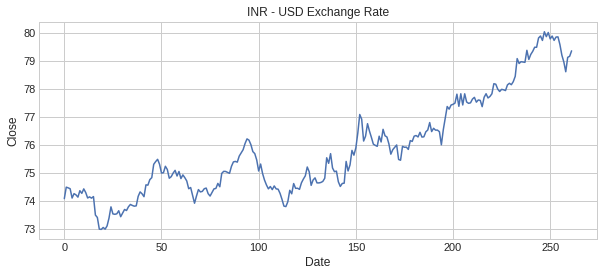

In [2]:

plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.996191  0.996164  0.999815   0.999815     NaN
High       0.996191  1.000000  0.995611  0.996177   0.996177     NaN
Low        0.996164  0.995611  1.000000  0.996268   0.996268     NaN
Close      0.999815  0.996177  0.996268  1.000000   1.000000     NaN
Adj Close  0.999815  0.996177  0.996268  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


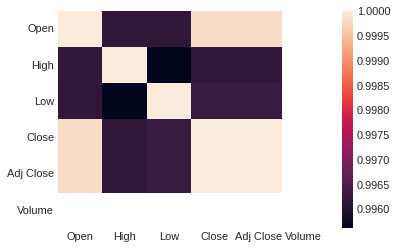

In [3]:

print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [4]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [6]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       79.876801
1       77.372398
2       76.047203
3       75.801201
4       74.163300
